In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('data/raw/survey_data_inflight_satisfaction_score.csv')

In [3]:
df.duplicated().sum()
# 0 duplicate rows

0

In [4]:
df.info()
# 31 columns
# flight_number, arrival_delay_minutes, number_of_legs and actual_flown_miles are int columns
# the rest of the columns are object columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47074 entries, 0 to 47073
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   flight_number                     47074 non-null  int64 
 1   origin_station_code               47074 non-null  object
 2   destination_station_code          47074 non-null  object
 3   record_locator                    47074 non-null  object
 4   scheduled_departure_date          47074 non-null  object
 5   question_text                     47074 non-null  object
 6   score                             47074 non-null  object
 7   satisfaction_type                 34963 non-null  object
 8   driver_sub_group1                 47074 non-null  object
 9   driver_sub_group2                 47074 non-null  object
 10  arrival_delay_minutes             47074 non-null  int64 
 11  arrival_delay_group               47074 non-null  object
 12  cabin_code_desc   

In [5]:
#df['scheduled_departure_date'].value_counts()
# should be date not object
df['scheduled_departure_date'] = pd.to_datetime(df['scheduled_departure_date'])
#df['scheduled_departure_date'].value_counts()

In [6]:
df.isna().sum()
# null values:
#  1- satisfaction_type -> 12111 
#  2- cabin_name -> 19980
#  3- entity -> 3 
#  4- loyalty_program_level -> 11616 
#  5- departure_gate -> 97 
#  6- arrival_gate -> 527 
#  7- media_provider -> 1539 

flight_number                           0
origin_station_code                     0
destination_station_code                0
record_locator                          0
scheduled_departure_date                0
question_text                           0
score                                   0
satisfaction_type                   12111
driver_sub_group1                       0
driver_sub_group2                       0
arrival_delay_minutes                   0
arrival_delay_group                     0
cabin_code_desc                         0
cabin_name                          19980
entity                                  3
number_of_legs                          0
seat_factor_band                        0
loyalty_program_level               11616
generation                              0
fleet_type_description                  0
fleet_usage                             0
equipment_type_code                     0
ua_uax                                  0
actual_flown_miles                

In [7]:
#df['cabin_code_desc'].value_counts()
#df['cabin_name'].value_counts()
#df[df['cabin_name'].isna()]['cabin_code_desc'].value_counts()
#df[df['cabin_name'].notna()]['cabin_code_desc'].value_counts()
# cabin_name shows whether the Economy cabin_code_desc is Economy/Economy Plus
# replace Economy in cabin_code_desc with Economy/Economy Plus
df.loc[df['cabin_code_desc'] == "Economy", 'cabin_code_desc'] = df['cabin_name']
df = df.drop(columns=['cabin_name'])

In [8]:
# drop rows where entity is null (only 3)
df = df.dropna(subset=['entity'])

In [9]:
df['satisfaction_type'] = df['satisfaction_type'].fillna('not_answered')

In [10]:
df['loyalty_program_level'] = df['loyalty_program_level'].fillna('no_program')

In [11]:
df['media_provider'] = df['media_provider'].fillna('no_provider')

In [12]:
df = df.dropna(subset=['arrival_gate'])

In [13]:
df = df.dropna(subset=['departure_gate'])

In [14]:
df.isna().sum()

flight_number                       0
origin_station_code                 0
destination_station_code            0
record_locator                      0
scheduled_departure_date            0
question_text                       0
score                               0
satisfaction_type                   0
driver_sub_group1                   0
driver_sub_group2                   0
arrival_delay_minutes               0
arrival_delay_group                 0
cabin_code_desc                     0
entity                              0
number_of_legs                      0
seat_factor_band                    0
loyalty_program_level               0
generation                          0
fleet_type_description              0
fleet_usage                         0
equipment_type_code                 0
ua_uax                              0
actual_flown_miles                  0
haul_type                           0
departure_gate                      0
arrival_gate                        0
internationa

In [15]:
# only 1 unique value -> drop column
df = df.drop(columns=['driver_sub_group1'])

In [16]:
#df[df['question_text'] == "What item did you choose?"]['driver_sub_group2'].value_counts()
#df[df['question_text'] != "What item did you choose?"]['driver_sub_group2'].value_counts()
# indicative of question_text column -> drop column
# comp -> What item did you choose?
# food and beverage satisfaction -> How satisfied were you with the food & beverage served on your flight from [CITY] to [CITY]?
df = df.drop(columns=['driver_sub_group2'])

In [17]:
#df[(df['arrival_delay_minutes'] <= 0)]['arrival_delay_group'].value_counts()
#df[(df['arrival_delay_minutes'] > 0)]['arrival_delay_group'].value_counts()
# indicative of arrival_delay_minutes -> drop column
# Early & Ontime -> arrival_delay_minutes <= 0
# Delayed -> arrival_delay_minutes > 0
df = df.drop(columns=['arrival_delay_group'])

In [18]:
#df['fleet_usage'].value_counts()
#df[df['fleet_usage'] == "Mainline"]['fleet_type_description'].value_counts()
#df[df['fleet_usage'] == "Express"]['fleet_type_description'].value_counts()
# indicative of fleet_type_description
# Mainline -> start with A/B
# Express -> start with C/E
df = df.drop(columns=['fleet_usage'])

In [19]:
#df['ua_uax'].value_counts()
#df[df['ua_uax'] == "UA"]['fleet_type_description'].value_counts()
#df[df['ua_uax'] == "UAX"]['fleet_type_description'].value_counts()
# indicative of fleet_type_description
# UA -> start with A/B
# UAX -> start with C/E
df = df.drop(columns=['ua_uax'])

In [20]:
#df['response_group'].value_counts()
# not important for our satisfaction analysis -> drop column
#df = df.drop(columns=['response_group'])

In [21]:
#df['number_of_legs'].value_counts()
# not important for our satisfaction analysis -> drop column
#df = df.drop(columns=['number_of_legs'])

In [22]:
#df['hub_spoke'].value_counts()
# not important for our satisfaction analysis -> drop column
#df = df.drop(columns=['hub_spoke'])

In [23]:
#df['haul_type'].value_counts()
print(df[df['haul_type'] == "Long"]['actual_flown_miles'].value_counts().max())
print(df[df['haul_type'] == "Long"]['actual_flown_miles'].value_counts().min())
print(df[df['haul_type'] == "Medium"]['actual_flown_miles'].value_counts().max())
print(df[df['haul_type'] == "Medium"]['actual_flown_miles'].value_counts().min())
print(df[df['haul_type'] == "Short"]['actual_flown_miles'].value_counts().max())
print(df[df['haul_type'] == "Short"]['actual_flown_miles'].value_counts().min())
# no relationship between haul_type and actual_flown_miles
# haul_type column may be incorrect? -> drop column?

664
14
709
1
121
1


In [24]:
# arrival_gate and departure_gate may be insignificant? -> drop column?
# retrieve previously dropped null values
# haul_type column may be incorrect? -> drop column?

In [25]:
df.describe()

,flight_number,scheduled_departure_date,arrival_delay_minutes,number_of_legs,actual_flown_miles
count,46448.000000,46448,46448.000000,46448.000000,46448.000000
mean,1483.542262,2022-09-15 07:30:05.580433920,-1.726016,1.339735,2504.537311
min,2.000000,2022-09-01 00:00:00,-104.000000,1.000000,45.000000
25%,467.750000,2022-09-08 00:00:00,-19.000000,1.000000,960.000000
50%,1034.000000,2022-09-15 00:00:00,-9.000000,1.000000,1874.000000
75%,2020.000000,2022-09-23 00:00:00,4.000000,2.000000,3892.000000
max,6375.000000,2022-09-30 00:00:00,907.000000,3.000000,8440.000000
std,1408.233901,NaN,37.954892,0.500586,1863.259948


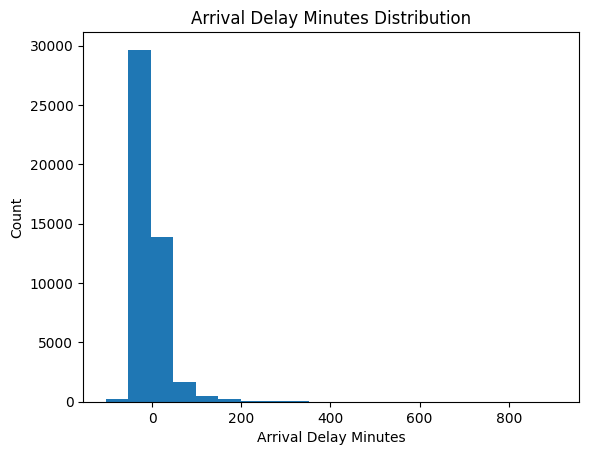

In [26]:
plt.hist(df['arrival_delay_minutes'], bins=20)
plt.title('Arrival Delay Minutes Distribution')
plt.xlabel('Arrival Delay Minutes')
plt.ylabel('Count')
plt.show()

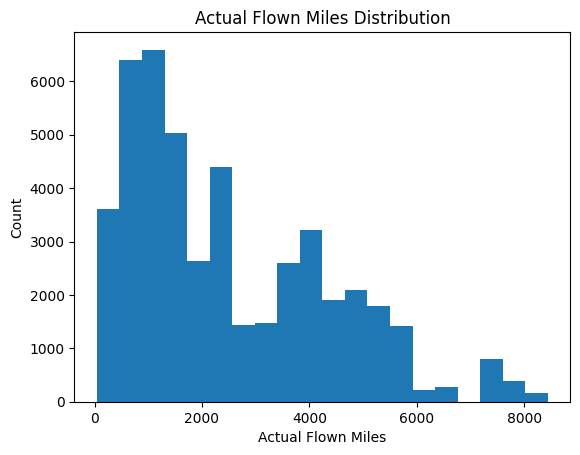

In [27]:
plt.hist(df['actual_flown_miles'], bins=20)
plt.title('Actual Flown Miles Distribution')
plt.xlabel('Actual Flown Miles')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Arrival Delay Outliers')

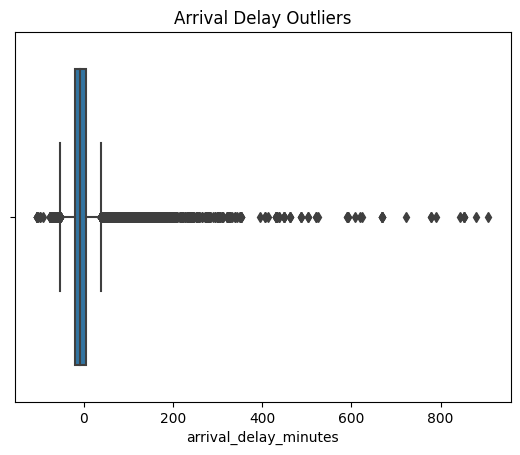

In [28]:
sns.boxplot(x=df['arrival_delay_minutes'])
plt.title('Arrival Delay Outliers')

Text(0.5, 1.0, 'Actual Flown Miles Outliers')

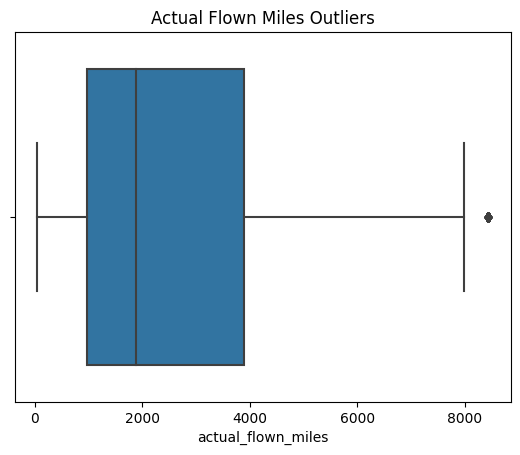

In [29]:
sns.boxplot(x=df['actual_flown_miles'])
plt.title('Actual Flown Miles Outliers')

In [30]:
df.describe(include=['object'])

,origin_station_code,destination_station_code,record_locator,question_text,score,satisfaction_type,cabin_code_desc,entity,seat_factor_band,loyalty_program_level,generation,fleet_type_description,equipment_type_code,haul_type,departure_gate,arrival_gate,international_domestic_indicator,response_group,media_provider,hub_spoke
count,46448,46448,46448,46448,46448,46448,46448,46448,46448,46448,46448,46448,46448,46448,46448,46448,46448,46448,46448,46448
unique,207,188,32546,2,12,3,4,4,4,8,7,22,40,3,656,692,2,3,5,2
top,IAX,EWX,L8XXD1,How satisfied were you with the food & beverag...,2,Dissatisfied,Economy,Domestic,90+,non-elite,Boomer,B737-900,37K,Medium,A8,HOLD,Domestic,member,PANASONIC,hub departure
freq,5654,7056,6,34354,8140,21976,17970,28628,31416,19040,21960,6835,6363,26149,588,965,28628,34950,24977,23818


In [31]:
#df['generation'].value_counts()
# 3 NBK?
#df['loyalty_program_level'].value_counts()
# 3 NBK?
#df[df['generation'] == 'NBK']['loyalty_program_level']
# same 3 rows -> drop rows
df = df[df['generation'] != 'NBK']

In [32]:
#df['origin_station_code'].value_counts()
#df[df['origin_station_code'].str.len() != 3]
#df[df['origin_station_code'].notna() & ~df['origin_station_code'].str.isupper()]
# clean
#df['destination_station_code'].value_counts()
#df[df['destination_station_code'].str.len() != 3]
#df[df['destination_station_code'].notna() & ~df['origin_station_code'].str.isupper()]
# clean
#df['record_locator'].value_counts()
#df[df['record_locator'].str.len() != 6]
#df[df['record_locator'].notna() & ~df['origin_station_code'].str.isupper()]
# clean

In [33]:
# drop arrival_gate with weird formats
df = df[df['arrival_gate'].astype(str).str.match(r'^[A-Z0-9]+$')]

In [34]:
# drop departure_gate with weird formats
df = df[df['departure_gate'].astype(str).str.match(r'^[A-Z0-9]+$')]

In [35]:
!rm -rf /kaggle/working/*

In [ ]:
df.to_csv('data/cleaned/survey_data_inflight_satisfaction_score_cleaned.csv', index=False)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45833 entries, 0 to 47073
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   flight_number                     45833 non-null  int64         
 1   origin_station_code               45833 non-null  object        
 2   destination_station_code          45833 non-null  object        
 3   record_locator                    45833 non-null  object        
 4   scheduled_departure_date          45833 non-null  datetime64[ns]
 5   question_text                     45833 non-null  object        
 6   score                             45833 non-null  object        
 7   satisfaction_type                 45833 non-null  object        
 8   arrival_delay_minutes             45833 non-null  int64         
 9   cabin_code_desc                   45833 non-null  object        
 10  entity                            45833 non-null  o